### Decision Tree (DecisionTreeClassifier)

- 잘 쓰면 트리모델 만한 게 없다.
- [하이퍼파라미터](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - criterion : 불순도 계산 함수 (”gini”,”entropy” 의 큰 차이는 없다.)
    - splitter : 노드 분할 방법 ( 랜덤이 더 좋을 때도 있다.)
        - best : 정보의 이득이 최대가 될 때 까지
        - random : 랜덤하게
    - max_depth : 트리의 깊이 (1을 준 이 모델은 스텀프라 부른다. 부스터로 사용하면 강력!)
    - min_sample_split : 최소 샘플 수 (기본 값 2)
    - min_sample_leaf : 최소 잎의 수 (최소 하나 이상)
    - max_features : 특성의 수 ( input 의 특성에서 개수 만큼 랜덤 추출한다.)
    - random_state : 랜덤 시드
    - max_leaf_nodes : 리프 노드의 전체 샘플 개수
    - min_impurity_decrese : 가지 치기위한 최소 불순도 감소

### 불순도
- IG(information Gain)
    - $$IG(D_p,f_i) = G(D_p) - \frac{N_l}{N_p} G(D_l) - \frac{N_r}{N_p} G(D_r)$$
        - $G(D_p)$ : 부모 노드의 불순도
        - $G(D_l)$ : 왼 자식 노드의 불순도
        - $G(D_r)$ : 오른 자식 노드의 불순도
        - $N_p$ : 부모 노드의 수
        - $N_l$ :왼 자식 노드의 수
        - $N_r$ : 오른 자식 노드의 수
- 불순도(”gini”)  $G(D_j)$ :   
    $$
    G(D) = 1 - \sum_{i=0}^{K}  \left(  \frac{N_{i}}{N} \right )^2
    $$
    
    - $K$ : 클래스 수 $(0, 1, 2, … K )$
    - $N$ : 전체 샘플 수
    - $N_i$ : 클래스 i 의 샘플 수
- feature 의 중요도 Importances
    
    $$
    I(f_i) = \sum \frac{N_p}{N} \left (G(D_p) - \frac{N_l}{N_p}G(D_l) - \frac{N_r}{N_p}G(D_r) \right)
    $$
    
    - $f_i$  : 피쳐 $i$

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [37]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 잘쓰면 트리모델만큼 좋은게 없다.
from sklearn import metrics

In [38]:
data = pd.read_csv("../../../data/heart.csv")
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [39]:
X = data.drop(columns="output")
y = data["output"]

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    )

In [40]:
model = DecisionTreeClassifier(max_depth=3, random_state=97)
model.fit(x_train.values, y_train.values)
prediction = model.predict(x_test.values)

print(metrics.accuracy_score(prediction, y_test))

0.7692307692307693


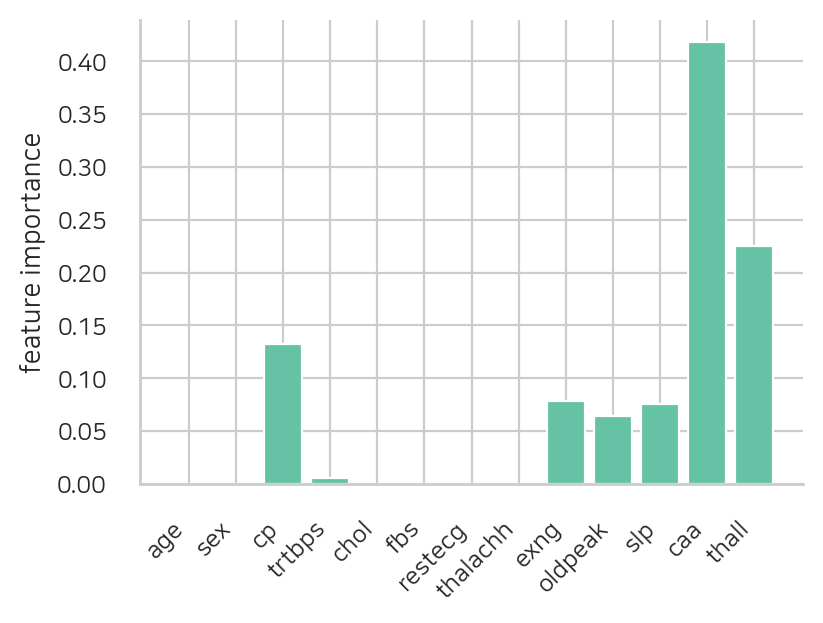

In [41]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.feature_selection import mutual_info_classif

model.feature_importances_

fig,ax = plt.subplots(figsize=(4,3))

ax.bar(data.columns[:-1], model.feature_importances_)
ax.spines[["top","right"]].set_visible(False)
ax.set(ylabel = "feature importance")

plt.setp(ax.get_xticklabels(),ha="right", rotation = 45);

In [42]:
# 트리 그래프 툴
# import graphviz
# from sklearn.tree import export_graphviz
# from sklearn.feature_selection import mutual_info_classif

# img = export_graphviz(model, out_file="decision_tree.dot")

# with open("decision_tree.dot") as f:
#     dot_graph = f.read()

# graphviz.Source(dot_graph)

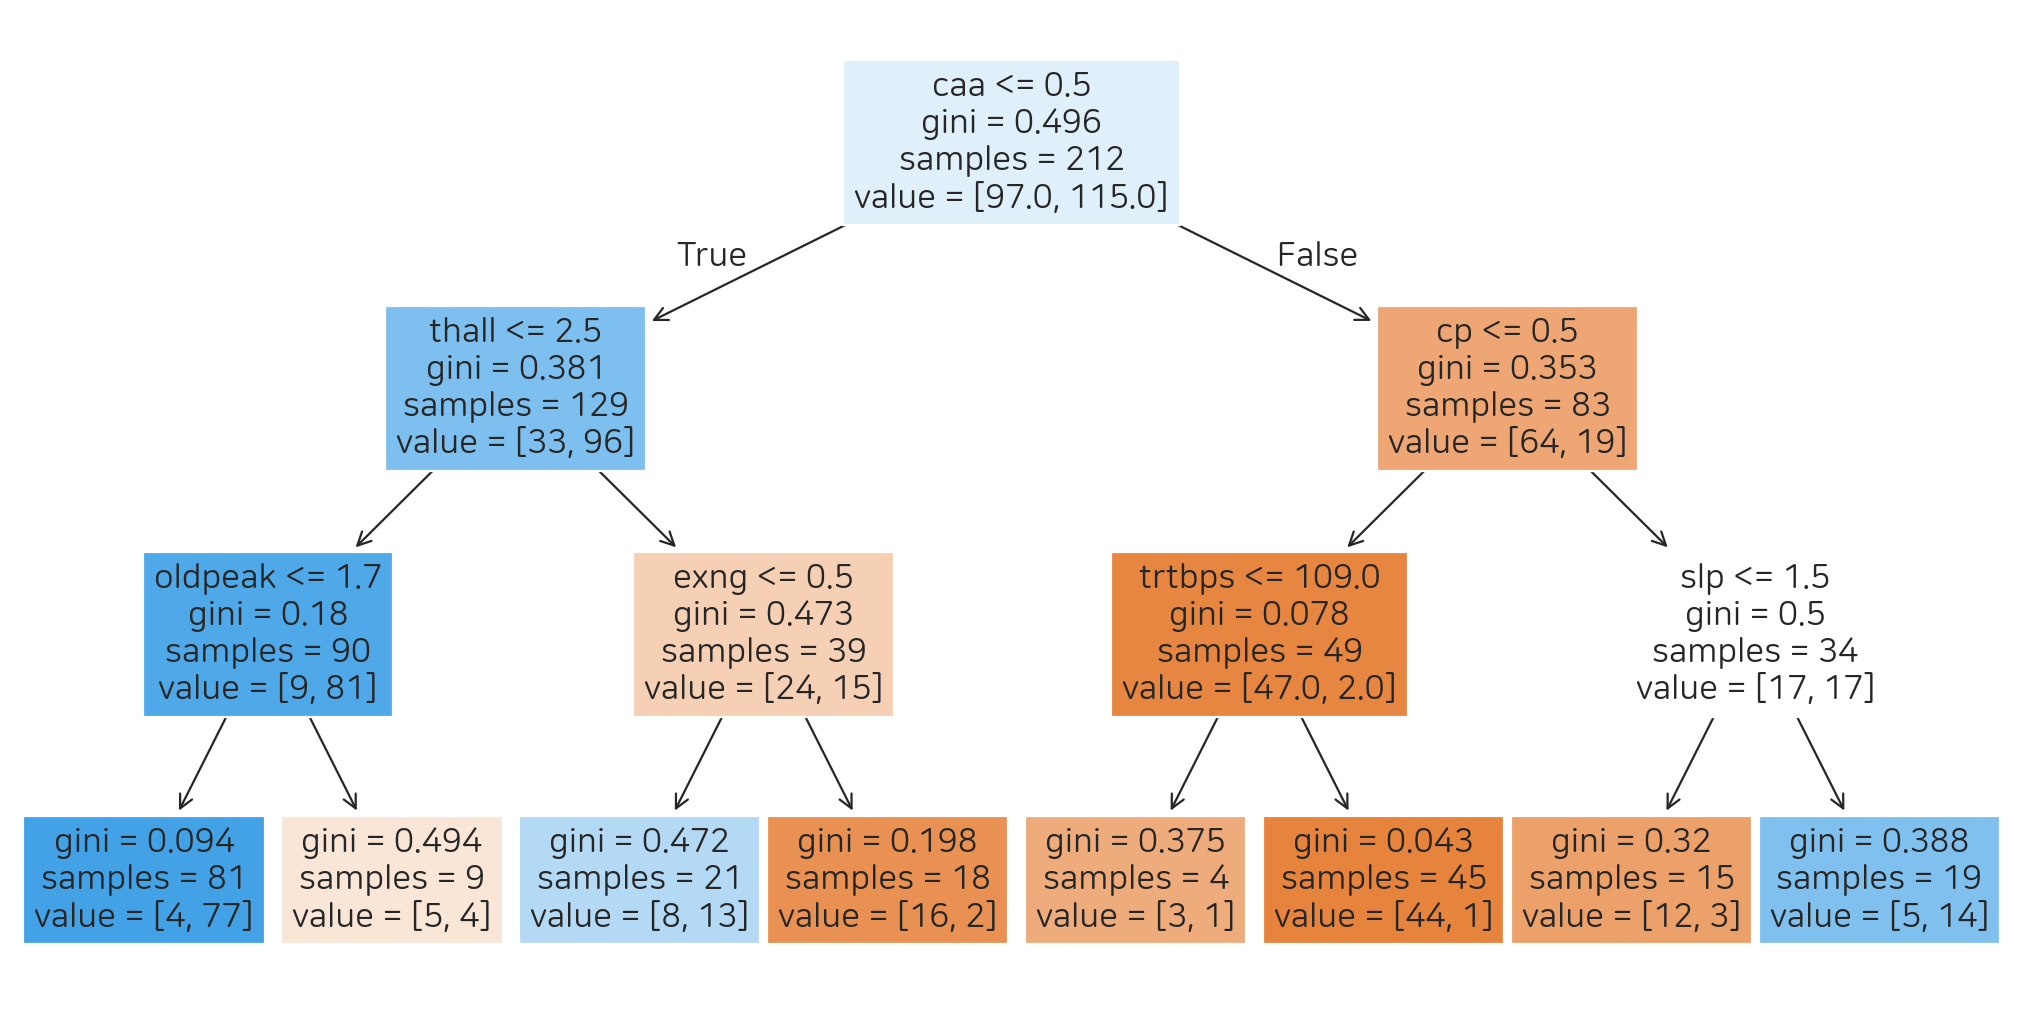

In [43]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(10,5))
plot_tree(model, filled=True, feature_names=data.columns, fontsize=12)
plt.show()

### 분류 vs 회귀 : DecisionTreeClassifier vs DecisionTreeRegressor
- **Split 기준**
    - **분류**: 각 분할에서 클래스의 불순도(Gini 불순도 또는 엔트로피)를 줄이는 것이 목표입니다. 최종적으로 클래스 레이블 내에서 동질적인 하위 그룹을 만드는 것을 목표로 합니다.
    - **회귀**: 분할 시 노드 내 분산 또는 평균제곱오차(MSE)를 최소화하는 것을 목표로 합니다. 목표는 가능한 한 예측 값이 서로 가까운 리프 노드로 데이터를 분할하는 것입니다.

- Leaf Node Prediction
  - **분류**: 대부분의 훈련 인스턴스에서 속하는 클래스를 리프 노드에서 예측합니다.
  - **회귀**: 리프 노드에서 해당 인스턴스의 목표 값의 평균 또는 중앙값을 사용하여 예측합니다.
- 공통점
  - **트리 구조**: 결정 트리는 트리 형태의 모델로, 각 노드는 특정 속성에 대한 테스트를 나타내고 각 분기는 테스트 결과를 표시합니다. 예측은 최종적으로 리프 노드에 도달함으로써 이루어집니다.
  - **재귀적 분할**: 데이터를 재귀적으로 나누어, 목표 변수에 대해 최대한 비슷한 하위 집합으로 분할합니다. 이는 보통 이진 분할 방식으로 이루어집니다.
  - **정지 기준**: 트리의 성장을 제한하기 위해 `max_length`, `min_samples_split`, `min_samples_leaf` 등의 매개변수를 설정하여 과적합을 방지합니다.
- Example
  - **분류**: 이메일이 스팸인지 아닌지를 분류하는 작업.
  - **회귀**: 주택의 크기와 위치를 포함한 특징을 기반으로 주택 가격을 예측하는 작업.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_iris
from sklearn.datasets import make_regression

Accuracy: 100.00%


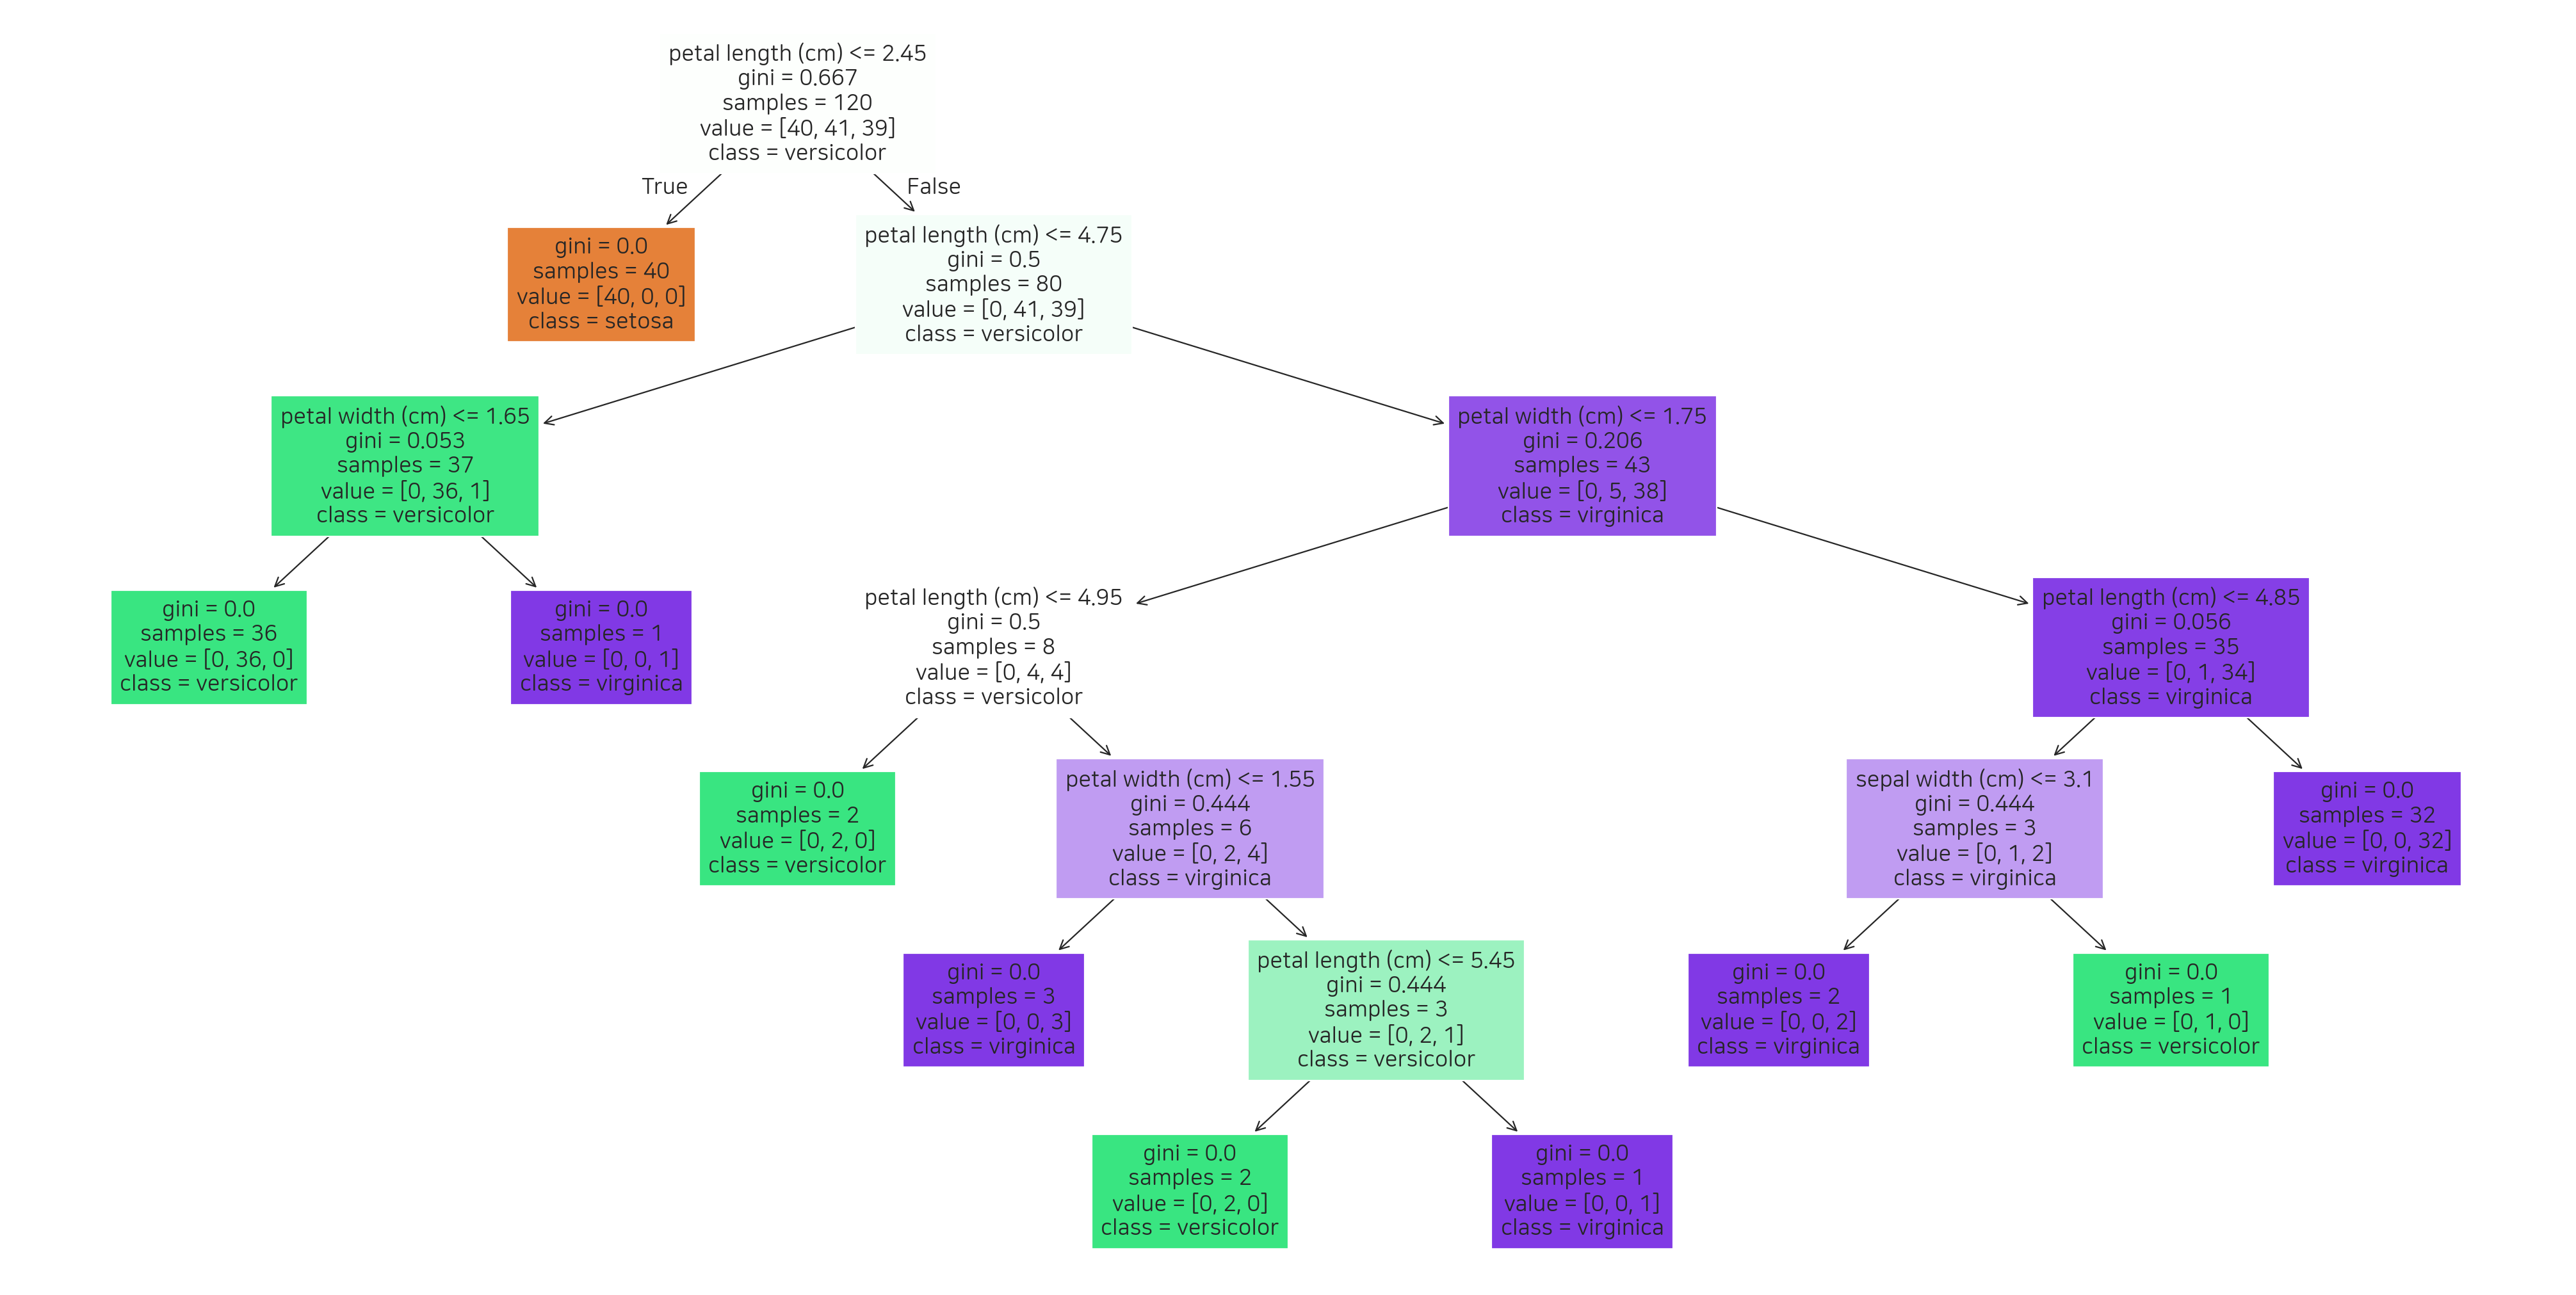

In [45]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model with the training data
clf.fit(X_train, y_train)

# Predict the test dataset
predictions = clf.predict(X_test)

# Print accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

Mean Squared Error (MSE): 1236.6527222013779
Coefficient of Determination (R^2): 0.5107019143877602


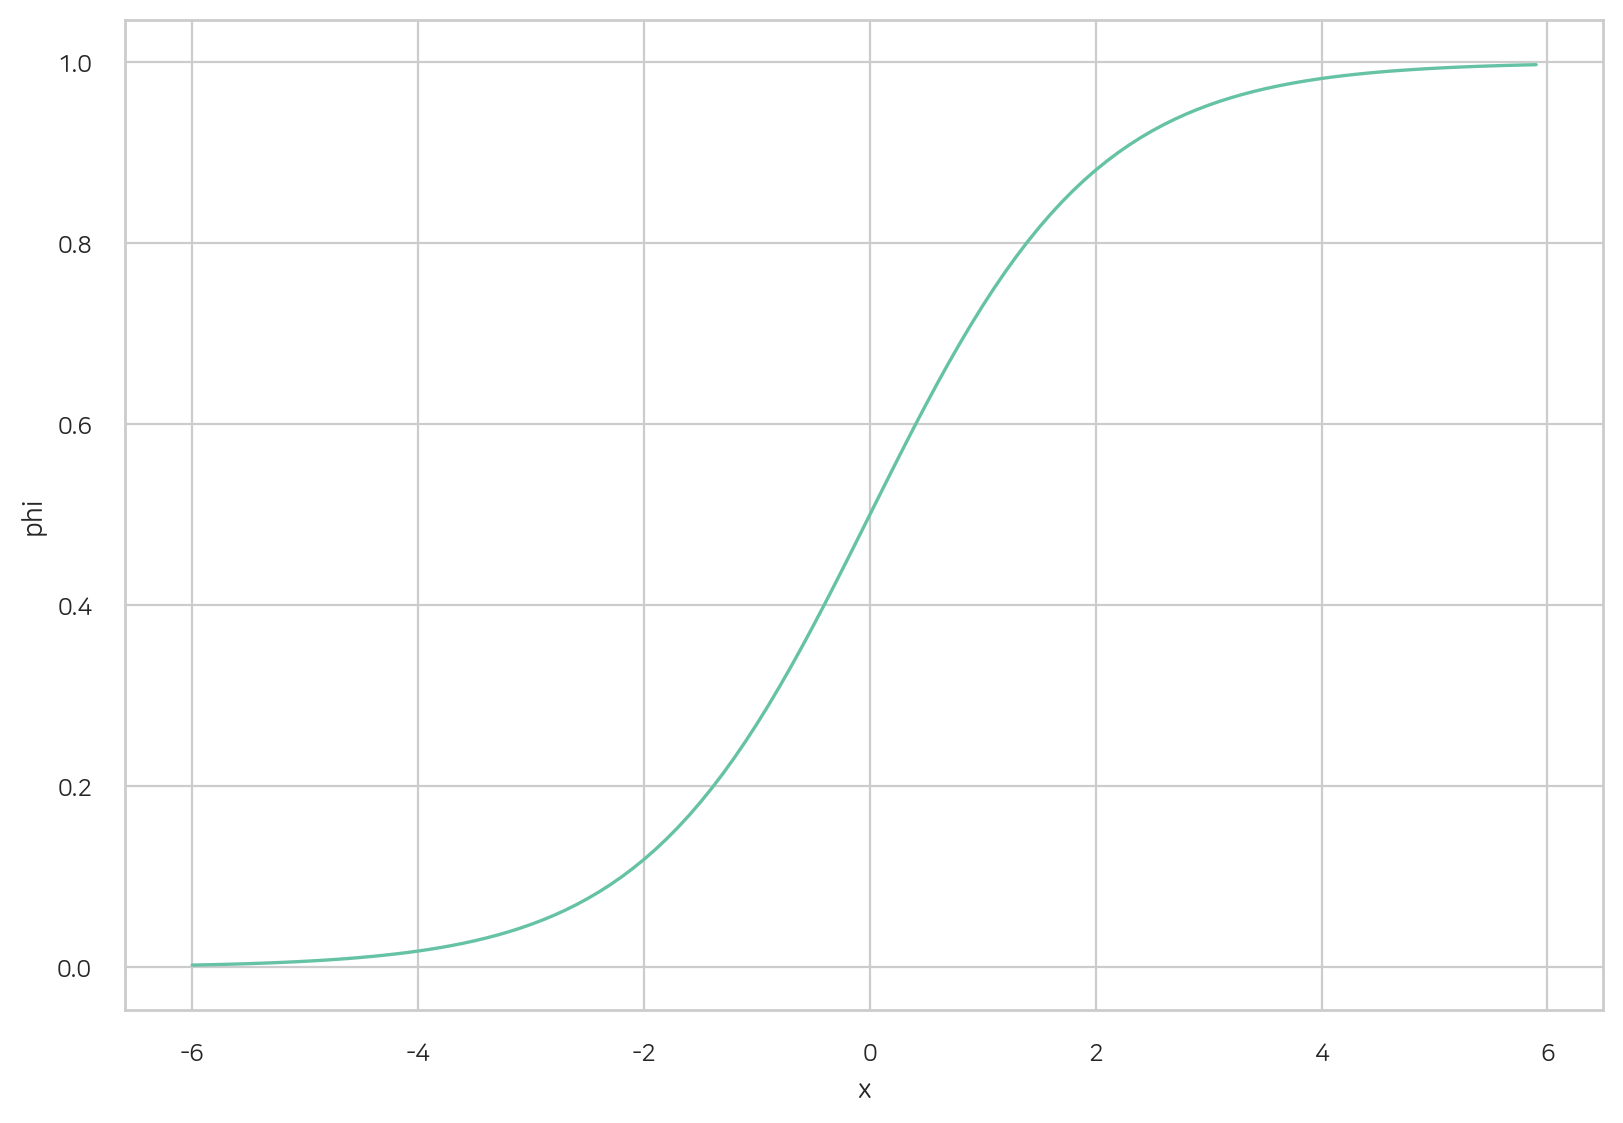

In [46]:
# 임의의 회귀 데이터 생성
X, y = make_regression(n_features=1, n_informative=1, noise=30, random_state=0)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 결정 트리 회귀 모델 생성
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=1)

# 모델 학습
tree_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = tree_reg.predict(X_test)

# 성능 지표 계산 및 출력
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

x = np.arange(-6, 6, 0.1)
phi = 1 / (1 + np.exp(-x))

plt.plot(x, phi)
plt.xlabel('x')
plt.ylabel('phi')

plt.show()